# File Upload & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload File
df = pd.read_csv("USvideos_modified.csv", sep=",")

#filling in descriptions that were blank
df.description= df.description.fillna('No description provided')
df.tags= df.tags.fillna('')
df = df.dropna() #no information provided for subscribers to we eliminate those rows

print(df.shape)
df.head()

(4525, 23)


,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0


## Feature Selection by Box Plot Visualization

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def lin_reg_bp(df,var_1,var_2):
    
    X = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = LinearRegression()
    
    # Fit the data(train the model)
    regression_model.fit(X, y)
    
    # Predict
    y_predicted = regression_model.predict(X)
    
    # Create dataframe for data
    df_var = pd.DataFrame({var_1:X.flatten(), var_2: y_predicted})
    
    # Plot
    boxplot = df_var.boxplot(column=[var_1,var_2])
    return boxplot

## Linear Regression & Evaluation Metrics 

In [4]:
def linear_regression(df,var_1,var_2):
    
    x = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = LinearRegression()
    
    # Fit the data(train the model)
    regression_model.fit(x, y)
    
    # Predict
    y_predicted = regression_model.predict(x)
    
    # model evaluation
    rmse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y, y_predicted)
    
    # printing values
    print('Slope:' ,regression_model.coef_)
    print('Intercept:', regression_model.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    # plotting values
    # data points
    plt.scatter(x, y, s=10)
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    # predicted values
    plt.plot(x, y_predicted, color='red')
    plt.show()

### # of days Trending vs Days It Takes to Trend After Published

<AxesSubplot:>

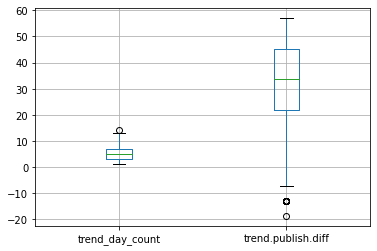

In [5]:
lin_reg_bp(df,'trend_day_count','trend.publish.diff')

From this box plot we see that the majority of videos take about 22 to 45 days to trend after published

Slope: [1.53339882]
Intercept: 25.87819253438114
Root mean squared error:  31.613717785739055
R2 score:  0.20760065567401675


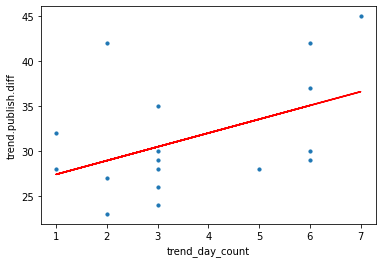

In [6]:
#Extract rows for which videos trended in 30 or less days after published

df_30ldaystrend = df.loc[(df['trend.publish.diff'] > 21) & (df['trend.publish.diff'] < 46)]
linear_regression(df_30ldaystrend,'trend_day_count','trend.publish.diff')

# Word-Cloud and Vectorization

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


(-0.5, 1999.5, 999.5, -0.5)

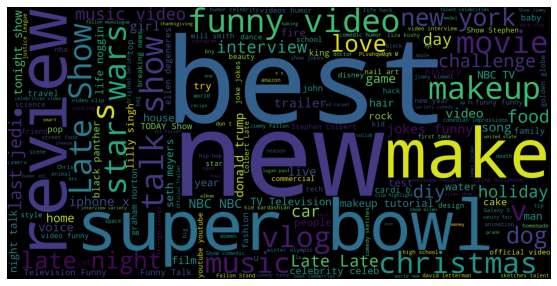

In [8]:
tags_complete=''.join(df.tags)
import re
tags= re.sub('[^a-zA-Z]', ' ', tags_complete)

tags= re.sub(' +', ' ', tags)

from wordcloud import WordCloud, STOPWORDS
wordcloud= WordCloud(width= 2000, height= 1000, stopwords= set(STOPWORDS)).generate(tags)
#Visualize
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

df = pd.read_csv("USvideos_modified.csv", sep=",")
df.head(3)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0


In [10]:
#filling in descriptions that were blank
df.description= df.description.fillna('No description provided')
df.tags= df.tags.fillna('')
df = df.dropna() #no information provided for subscribers to we eliminate those rows
df.shape

(4525, 23)

In [11]:
count=CountVectorizer()

count.fit(df['title'])

count.get_feature_names()

count_tranform=count.transform(df['title'])
# Need to convert into Array
cv_array=count_tranform.toarray()
#cv_array

C:\Users\zytal\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
limt_cv_title=CountVectorizer(stop_words='english',max_features=50,min_df=2)
limt_cv_title.fit(df['title'])
cv_transformed_title = limt_cv_title.fit_transform(df['title'])
cv_array_title = cv_transformed_title.toarray()
cv_df_title=pd.DataFrame(cv_array_title,columns=limt_cv_title.get_feature_names()).add_prefix("")
#limt_cv_title.get_feature_names()
#for col_name in cv_df_title.columns: 
    #print(col_name)

In [13]:
limt_cv_tags=CountVectorizer(stop_words='english',max_features=50,min_df=2)
limt_cv_tags.fit(df['tags'])
cv_transformed_tags = limt_cv_tags.fit_transform(df['tags'])
cv_array_tags = cv_transformed_tags.toarray()
cv_df_tags=pd.DataFrame(cv_array_tags,columns=limt_cv_tags.get_feature_names()).add_prefix("")
#limt_cv_tags.get_feature_names()
#for col_name in cv_df_tags.columns: 
    #print(col_name)

C:\Users\zytal\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
limt_cv_des=CountVectorizer(stop_words='english',max_features=50,min_df=1)
limt_cv_des.fit(df['description'])
cv_transformed_des = limt_cv_des.fit_transform(df['description'])
cv_array_des = cv_transformed_des.toarray()
cv_df_des=pd.DataFrame(cv_array_des,columns=limt_cv_des.get_feature_names()).add_prefix("")
#limt_cv_des.get_feature_names()
#for col_name in cv_df_des.columns: 
    #print(col_name)

C:\Users\zytal\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Count Vectorization

In [15]:
count_comparison = pd.DataFrame(cv_df_title.columns, columns=['Title'])
count_comparison["Tags"]= cv_df_tags.columns
count_comparison["Description"]= cv_df_des.columns
count_comparison

,Title,Tags,Description
0,10,2017,amzn
1,2017,2018,bit
2,2018,beauty,cbs
3,audio,best,channel
4,best,black,com
5,big,bowl,facebook
6,black,cat,gl
7,bowl,celebrity,goo
8,challenge,christmas,google
9,christmas,comedy,http


In [16]:
#### TITLE
def title_search_high(x):
    dfs = df.reset_index()  # make sure indexes pair with number of rows
    highest=0
    for index, row in dfs.iterrows():
        if x in row["title"].lower().split():
            if row["trend_tag_highest"]>highest:
                highest = row["trend_day_count"]
    return highest

appendage=[]
for x in count_comparison["Title"]:
    appendage.append(title_search_high(x))
titlewords=pd.DataFrame(count_comparison["Title"])
titlewords["Highest_Trending_Day_Count"]=appendage

#### TAGS
def tags_search_high(x):
    dfs = df.reset_index()  # make sure indexes pair with number of rows
    highest=0
    for index, row in dfs.iterrows():
        if x in row["tags"].lower().split():
            if row["trend_tag_highest"]>highest:
                highest = row["trend_day_count"]
    return highest

appendage=[]
for x in count_comparison["Tags"]:
    appendage.append(tags_search_high(x))
tagswords=pd.DataFrame(count_comparison["Tags"])
tagswords["Highest_Trending_Day_Count"]=appendage

#### DESCRIPTION
def des_search_high(x):
    dfs = df.reset_index()  # make sure indexes pair with number of rows
    highest=0
    for index, row in dfs.iterrows():
        if x in row["tags"].lower().split():
            if row["trend_tag_highest"]>highest:
                highest = row["trend_day_count"]
    return highest

appendage=[]
for x in count_comparison["Description"]:
    appendage.append(des_search_high(x))
deswords=pd.DataFrame(count_comparison["Description"])
deswords["Highest_Trending_Day_Count"]=appendage

In [17]:
X = titlewords.drop('Highest_Trending_Day_Count', axis=1)
y = titlewords['Highest_Trending_Day_Count']

str_features = ["Title"]
str_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("str", str_transformer, str_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Title")
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Title
model score: 0.400
model score: 0.400


In [18]:
X = tagswords.drop('Highest_Trending_Day_Count', axis=1)
y = tagswords['Highest_Trending_Day_Count']

str_features = ["Tags"]
str_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("str", str_transformer, str_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Tags")
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Tags
model score: 0.200
model score: 0.200


In [19]:
X = deswords.drop('Highest_Trending_Day_Count', axis=1)
y = deswords['Highest_Trending_Day_Count']

str_features = ["Description"]
str_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("str", str_transformer, str_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Description")
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Description
model score: 0.600
model score: 0.600


#### NOTE
#### This where the model stops working 

#### NOTE
This where the model stops working 

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", str_transformer, selector(dtype_include="category")),
    ]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))


In [ ]:
selector(dtype_include="category")(X_train)

In [ ]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "classifier__C": [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search

In [ ]:
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

In [ ]:
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_preprocessor__num__imputer__strategy",
        "param_classifier__C",
    ]
].head(5)

In [ ]:
print(
    (
        "best logistic regression from grid search: %.3f"
        % grid_search.score(X_test, y_test)
    )
)